<a href="https://colab.research.google.com/github/WheatSeeds/ML-LabW4/blob/main/ML_LabW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 4

# Многомерная регрессия

**Цель работы:** изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.

Набор данных содержит сведения о клиентах компании электронной коммерции,
которая продает одежду онлайн, а также проводит консультации по стилю и одежде в магазине. Клиенты приходят в магазин, проводят сеансы или встречи с персональным стилистом, а затем возвращаются домой и заказывают одежду, которую они хотят, либо через мобильное приложение, либо через веб-сайт. Необходима модель прогнозирования расходов клиентов электронной коммерции.
Атрибуты:

* **Email** – электронная почта
* **Address** – адрес
* **Avatar** – аватар
* **Avg Session Length** – средняя продолжительность сеанса консультирования постилю в магазине для аватара
* **Time on App** – среднее время, проведенное в приложении в минутах
* **Time on Website** – среднее время, проведенное на веб-сайте в минутах
* **Length of Membership** – продолжительность членства (сколько лет клиент является участником)
* **Yearly Amount Spent** – годовая сумма расходов

### 1. Импортируем необходимые библиотеки и загружаем данные

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("Ecommerce_Customers.csv")
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2. Получим информацию по датасете

In [30]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### 3. Проверяем наличие пропущенных значений и выбросов

In [31]:
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


### 4. Исключаем невлияющие признаки

In [32]:
df_copy = df.copy()

df_copy.drop("Email", axis=1, inplace=True)
df_copy.drop("Address", axis=1, inplace=True)
df_copy.drop("Avatar", axis=1, inplace=True)

df_copy.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### 5. Разделяем данные на признаки и целевую переменную

In [33]:
y = df_copy['Yearly Amount Spent']
x = df_copy.drop('Yearly Amount Spent', axis=1)

In [34]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [35]:
x.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


### 6. Разделяем данные на обучающую и тестовую выборку

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### 7. Применяем операцию нормализации для численной устойчивости

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

### 8. Масштабируем признаки обучающей выборки

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
scaler.mean_, scaler.scale_

(array([33.07069023, 12.05536054, 37.07218574,  3.57146075]),
 array([0.93829336, 0.98934513, 1.03206149, 0.98152988]))

### 9. Обучаем модель линейной регрессии

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

### 10. Делаем прогноз на основе данных тестирования

In [40]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
y_pred[:5]

array([438.38828993, 489.87912877, 370.64151577, 514.37404963,
       496.32026503])

In [41]:
from sklearn.metrics import root_mean_squared_error
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 9.817605900707497


In [42]:
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))


R2: 0.99


In [43]:
model.score(X_test_scaled, y_test)

0.985105078879716

### 11. Итоговое уравнение

In [44]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [24.2517772  38.40225059  0.20838911 60.60770352]
Intercept: 502.3944236129496


### 12. Оценим влияние признаков на целевую переменну

In [45]:
df_copy.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### 13. Визуализация результатов регрессии

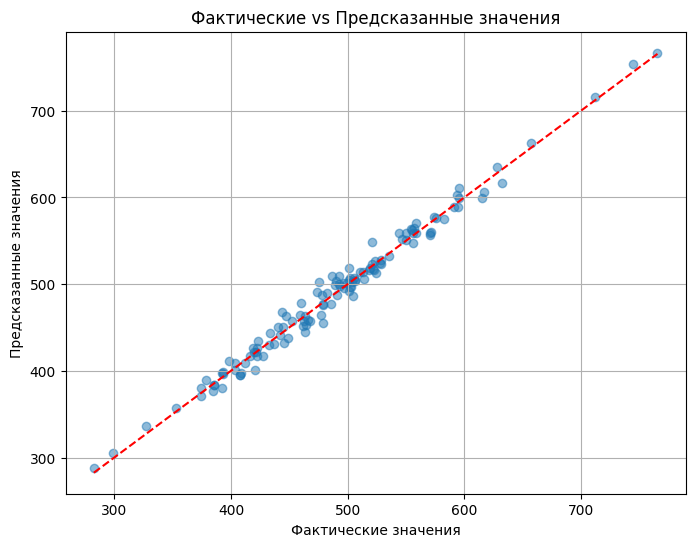

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

### 14. Остатки регрессии (Residuals Plot)

#### Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred).
#### Этот график помогает проверить важное предположение линейной регрессии: что остатки случайны и не имеют паттернов.

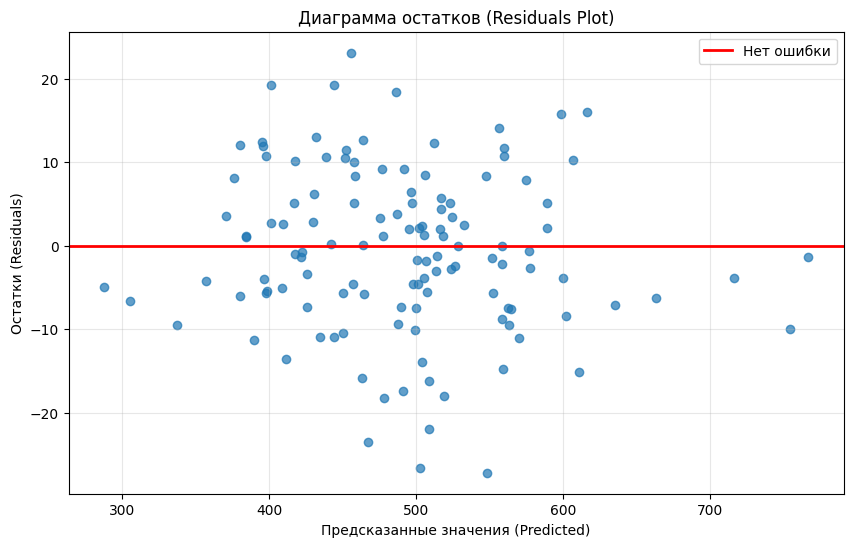

In [47]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()